In [1]:
from pyforest import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data=pd.read_csv('bigmart_train.csv')
test_data=pd.read_csv('bigmart_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
print('Train data: ',train_data.shape)
print('Test data: ',test_data.shape)

Train data:  (8523, 12)
Test data:  (5681, 11)


In [6]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [7]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
train_data['source']='train'
test_data['source']='test'
data=pd.concat([train_data,test_data],ignore_index=True)

<IPython.core.display.Javascript object>

In [10]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

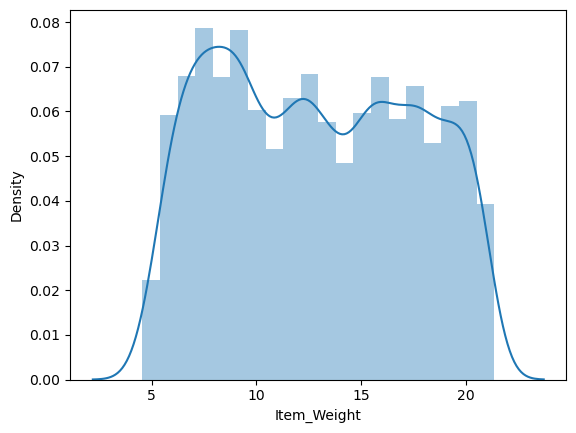

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

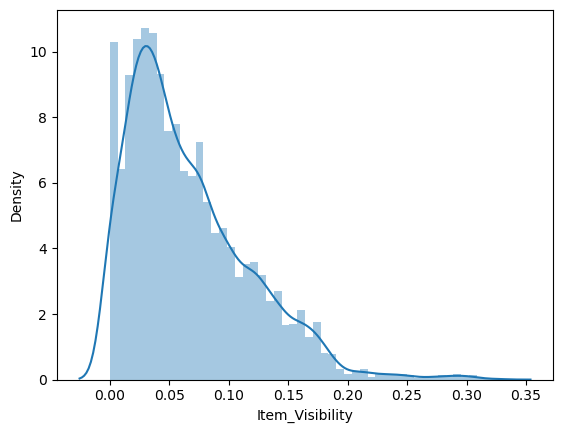

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

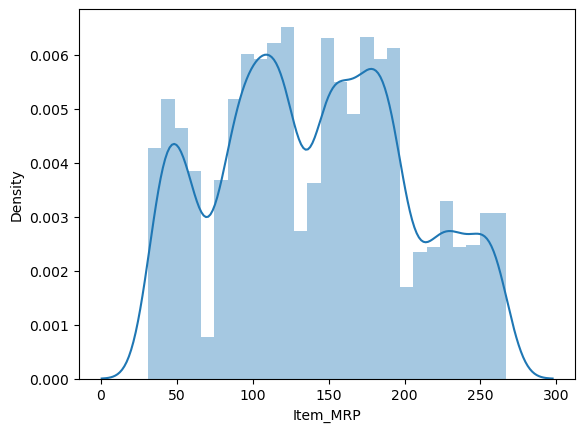

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

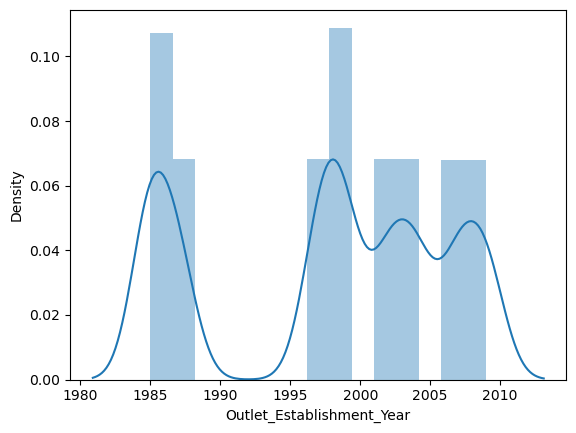

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

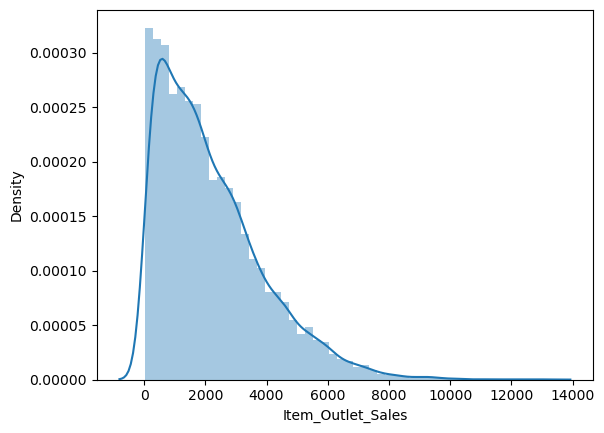

In [11]:
for i in train_data.describe().columns:
    sns.distplot(train_data[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

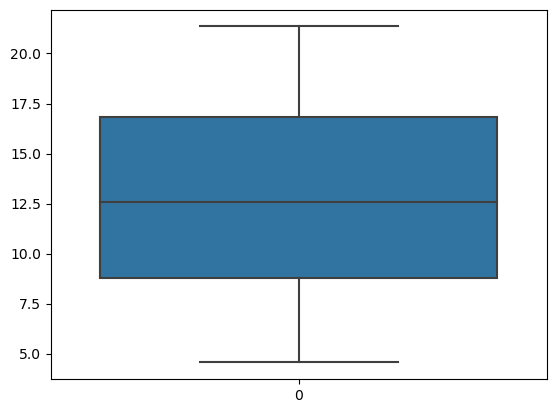

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

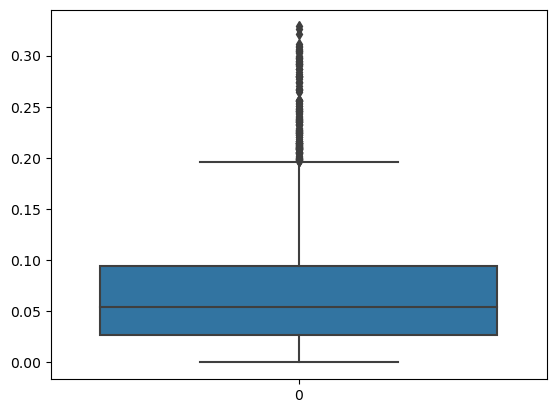

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

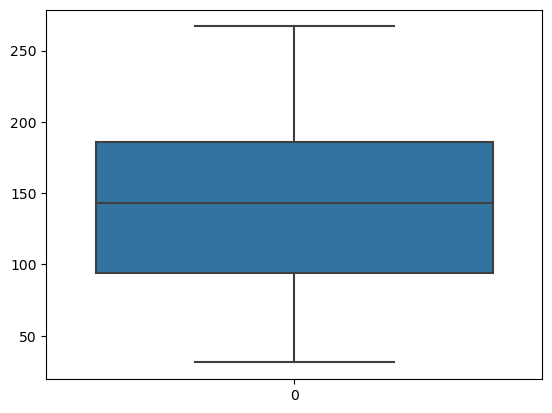

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

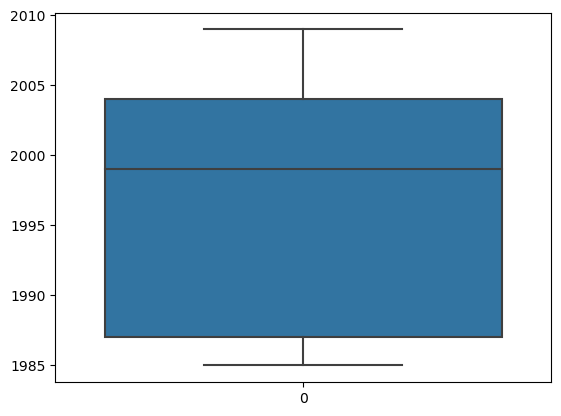

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

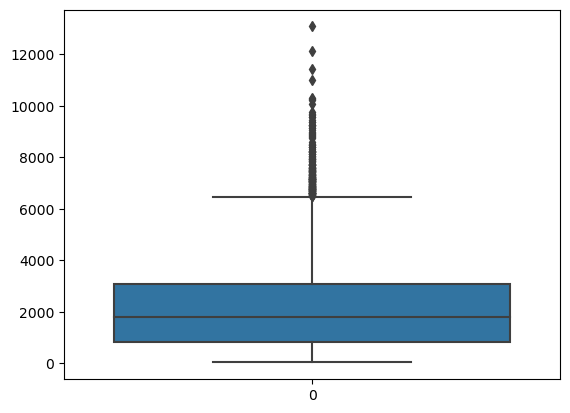

In [12]:
for i in train_data.describe().columns:
    sns.boxplot(train_data[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

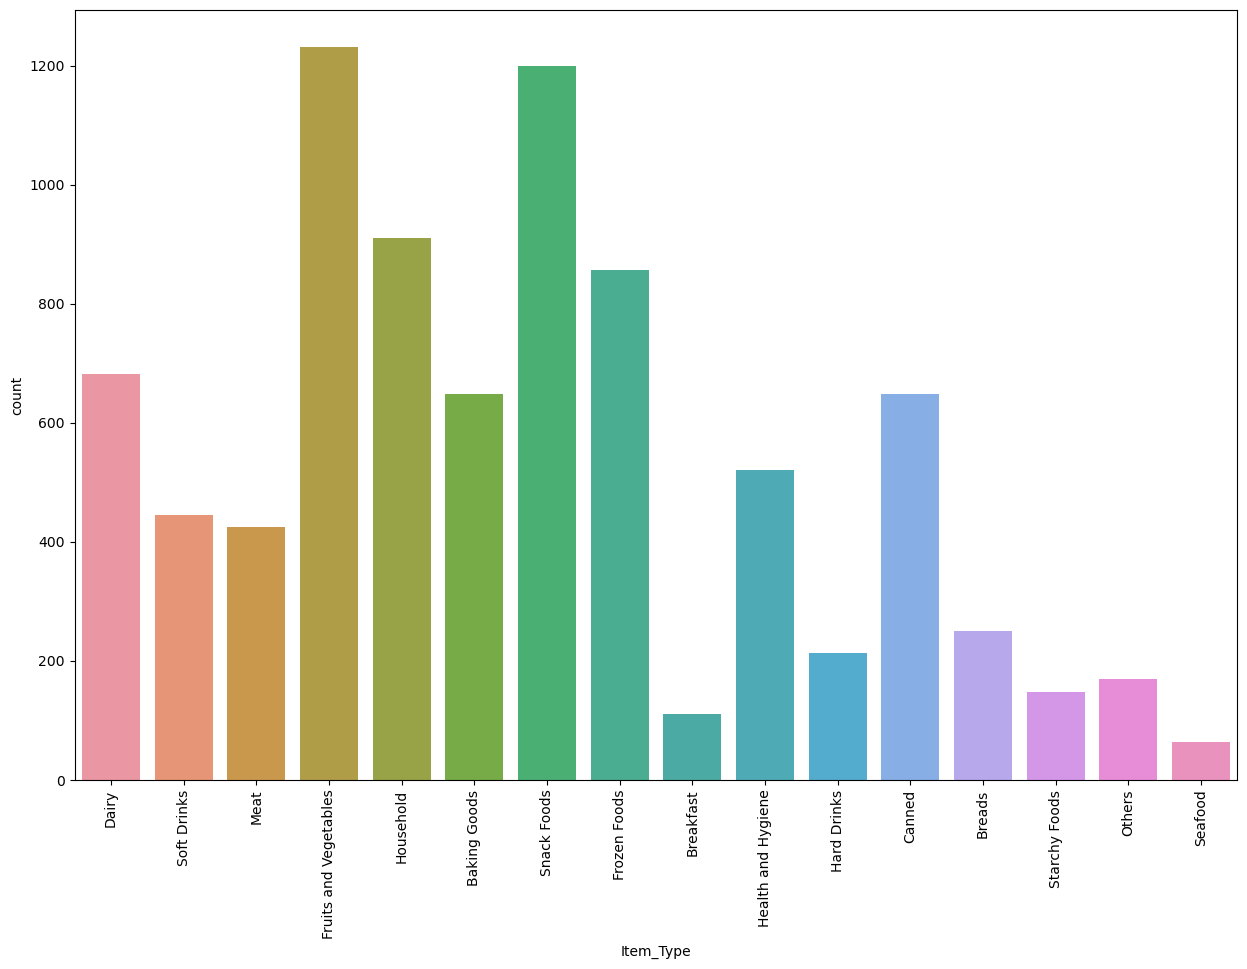

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x='Item_Type', data=train_data)
plt.xticks(rotation=90)
plt.show()

In [14]:
train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

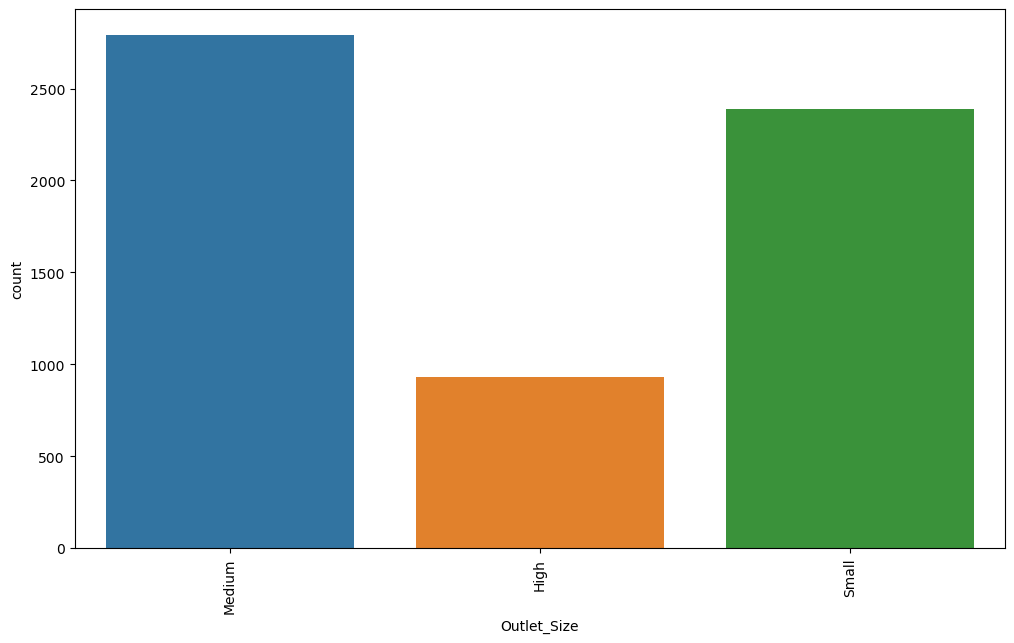

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(x='Outlet_Size', data=train_data)
plt.xticks(rotation=90)
plt.show()

In [16]:
train_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

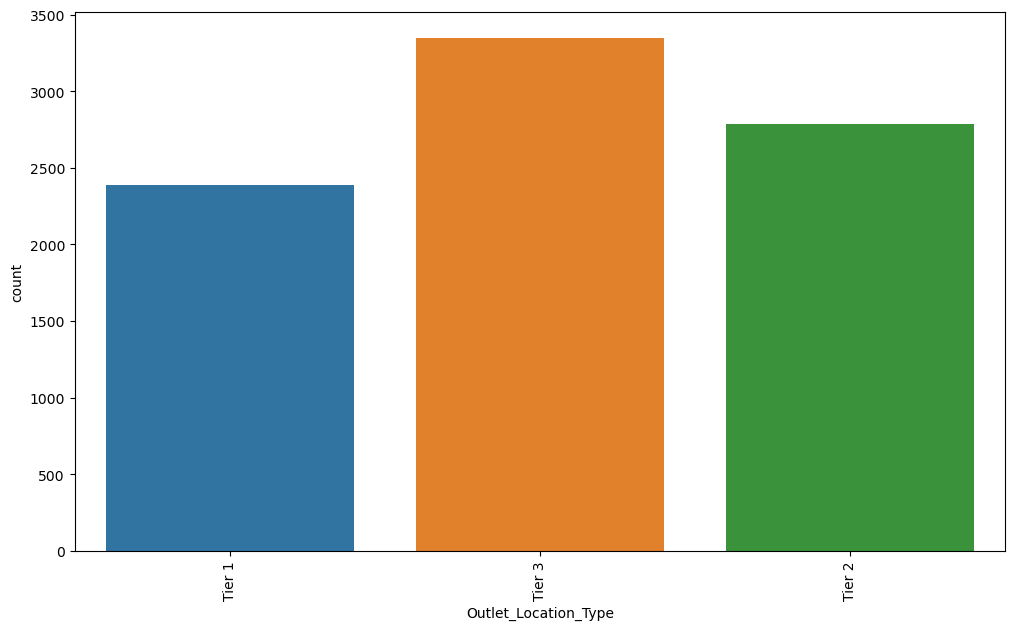

In [17]:
plt.figure(figsize=(12,7))
sns.countplot(x='Outlet_Location_Type', data=train_data)
plt.xticks(rotation=90)
plt.show()

In [18]:
train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

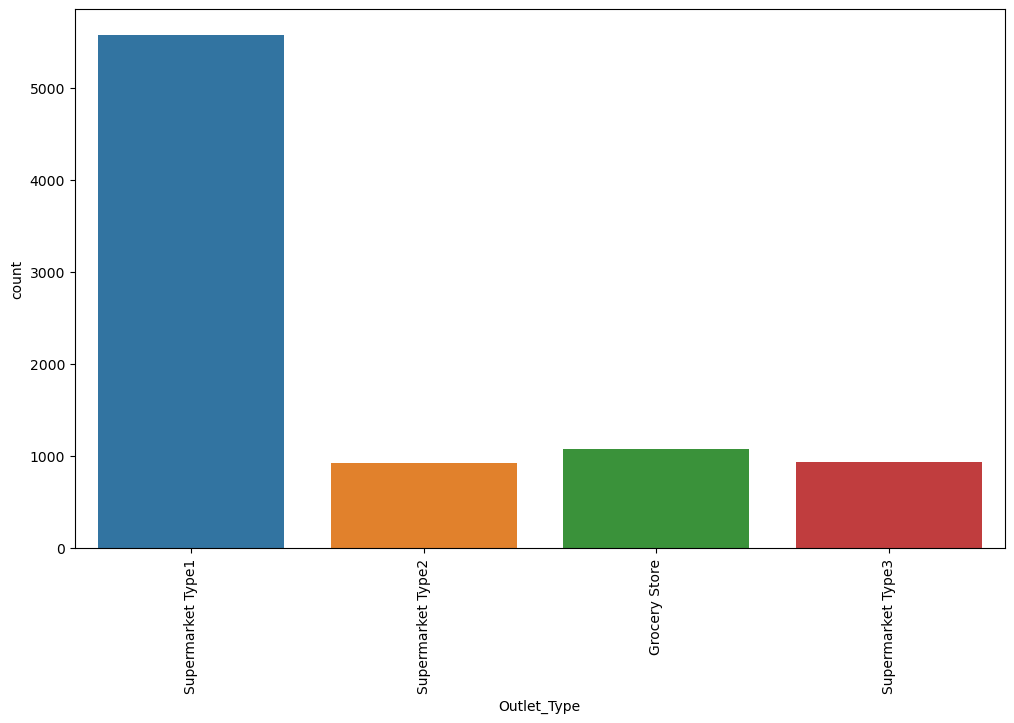

In [19]:
plt.figure(figsize=(12,7))
sns.countplot(x='Outlet_Type', data=train_data)
plt.xticks(rotation=90)
plt.show()

In [20]:
train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Item Weight and Item Sales Analysis'}, xlabel='Item Weight', ylabel='Item Outlet Sales'>

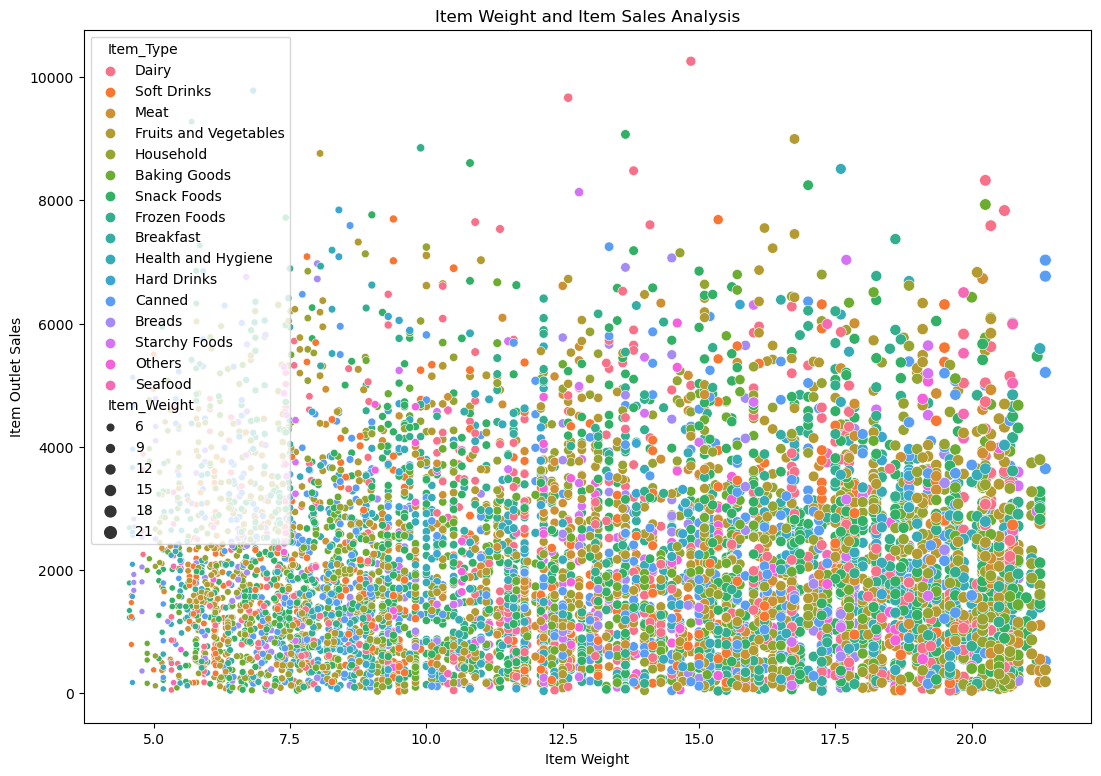

In [21]:
plt.figure(figsize=(13,9))
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.title('Item Weight and Item Sales Analysis')
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=train_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Item Weight and Item Sales Analysis'}, xlabel='Item_Visibility', ylabel='Item Outlet Sales'>

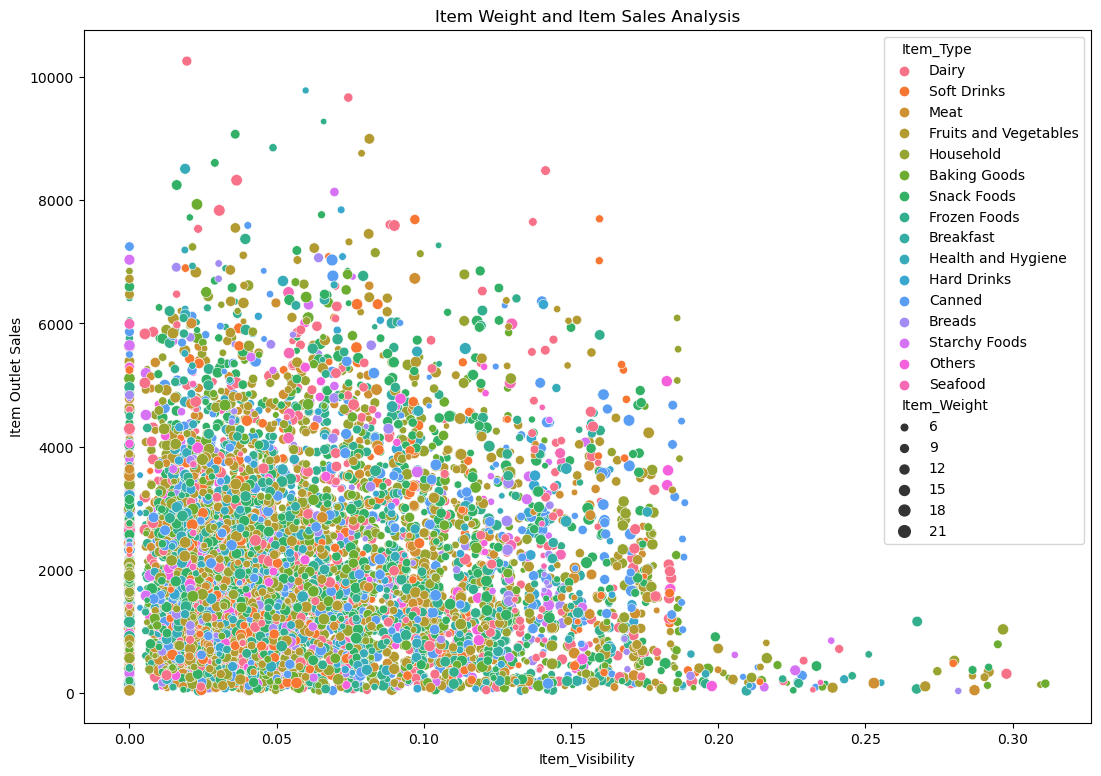

In [22]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Visibility')
plt.ylabel('Item Outlet Sales')
plt.title('Item Weight and Item Sales Analysis')
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=train_data)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

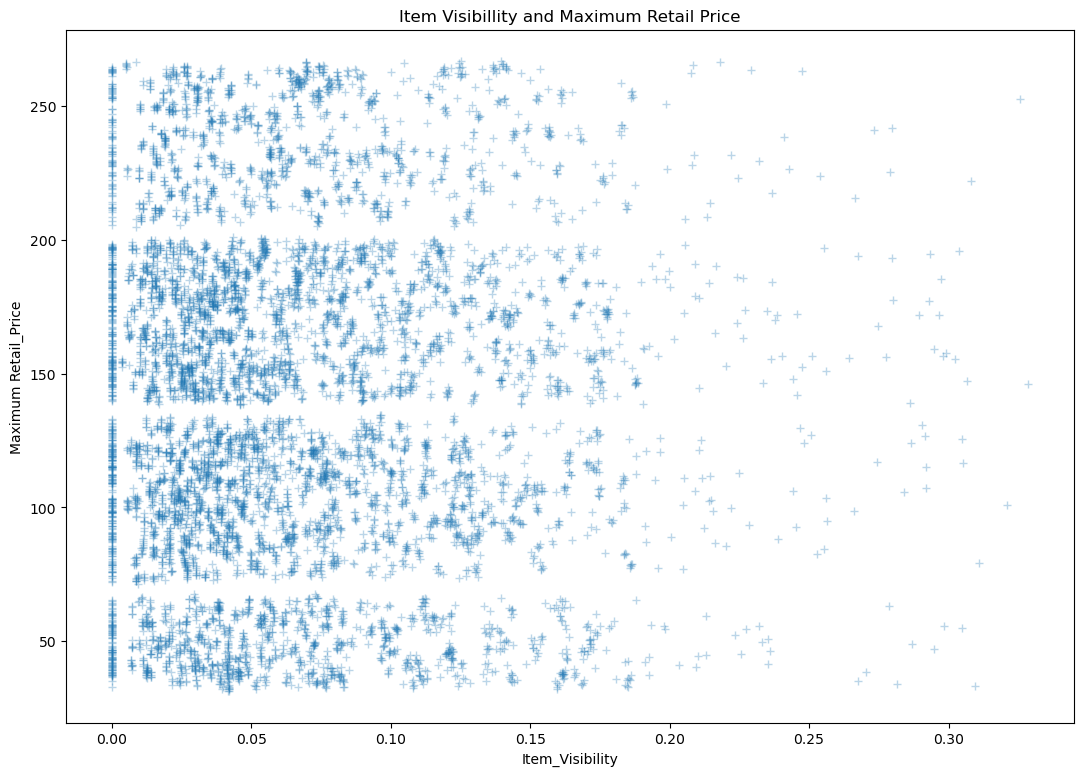

In [23]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail_Price')
plt.title('Item Visibillity and Maximum Retail Price')
plt.plot(train_data.Item_Visibility,train_data.Item_MRP,'+',alpha=0.3)

In [24]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [25]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [26]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

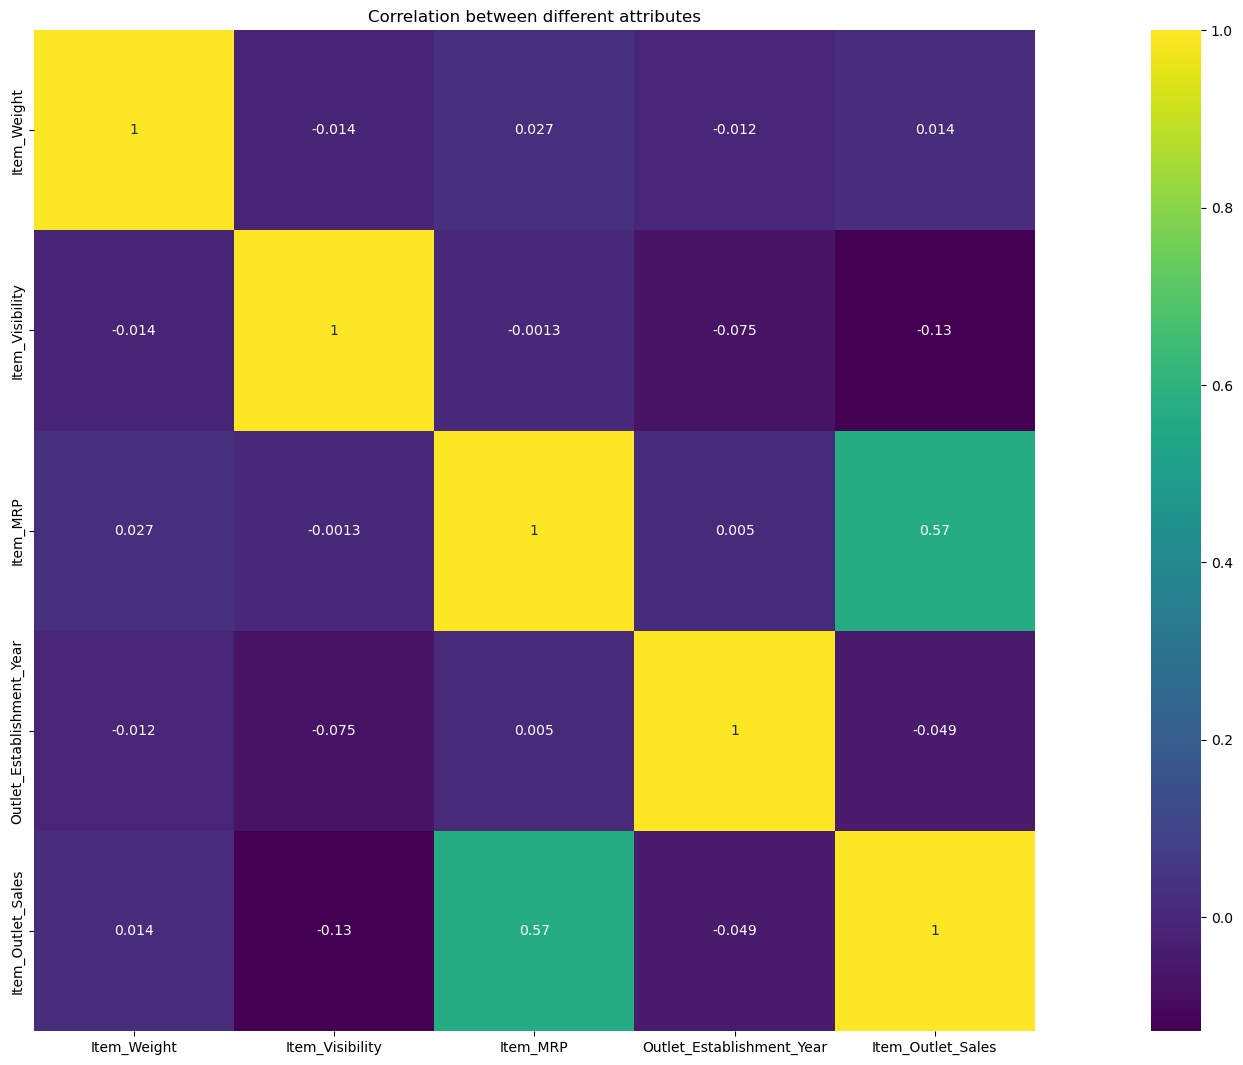

In [27]:
plt.figure(figsize=(30,13))
sns.heatmap(train_data.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

In [28]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [29]:
data['Item_Weight'].mean()

12.792854228644284

In [30]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [31]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [32]:
data['Outlet_Size'].fillna('Medium',inplace=True)

In [33]:
data[data['Item_Visibility']==0]['Item_Visibility'].count()

879

In [34]:
data['Item_Visibility']=data['Item_Visibility'].fillna(data['Item_Visibility'].median(),inplace=True)

In [35]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [36]:
data['Outlet_Years']=2010-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        12.169319
std          8.371664
min          1.000000
25%          6.000000
50%         11.000000
75%         23.000000
max         25.000000
Name: Outlet_Years, dtype: float64

In [37]:
data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [38]:
data['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [39]:
data['New_item_type']=data['Item_Identifier'].apply(lambda x: x[0:2])


In [40]:
data['New_item_type']=data['New_item_type'].map({'FD':'Food','NC':'Non Consumable','DR':'Drinks'})
data['New_item_type'].value_counts()

Food              10201
Non Consumable     2686
Drinks             1317
Name: New_item_type, dtype: int64

In [41]:
data.loc[data['New_item_type']=='Non-Consumable','Item_Fat_Content']= "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [42]:
# Using pivot_table to reshape the data
item_visibility = data.pivot_table(index='Item_Identifier', values='Item_Visibility', aggfunc='mean').reset_index()

# Displaying the result
print(item_visibility.value_counts())


Series([], dtype: int64)


In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
label=LabelEncoder()
data['Outlet']=label.fit_transform(data['Outlet_Identifier'])
variab=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_item_type','Outlet_Type','Outlet']
for i in variab:
    data[i]=label.fit_transform(data[i])

In [45]:
data=pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_item_type','Outlet_Type','Outlet'])
data.dtypes

<IPython.core.display.Javascript object>

Item_Identifier               object
Item_Weight                  float64
Item_Visibility               object
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_item_type_0                uint8
New_item_type_1                uint8
New_item_type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [46]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,None,Dairy,249.8092,OUT049,1999,3735.1380,train,11,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,None,Soft Drinks,48.2692,OUT018,2009,443.4228,train,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,None,Meat,141.6180,OUT049,1999,2097.2700,train,11,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,None,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,12,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,None,Household,53.8614,OUT013,1987,994.7052,train,23,...,0,1,0,0,0,0,0,0,0,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Visibility            0 non-null      object 
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   source                     14204 non-null  object 
 9   Outlet_Years               14204 non-null  int64  
 10  Item_Fat_Content_0         14204 non-null  uint8  
 11  Item_Fat_Content_1         14204 non-null  uint8  
 12  Outlet_Location_Type_0     14204 non-null  uint8  
 13  Outlet_Location_Type_1     14204 non-null  uin

# Model Building

In [58]:
data.drop(['Item_Visibility'],axis=1,inplace=True)

In [50]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1, inplace=True)

KeyError: "['Item_Type', 'Outlet_Establishment_Year'] not found in axis"

In [59]:
train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test'] 

In [60]:
train.drop(['source'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [61]:
X_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train = train['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

# Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [66]:
lrpredict=lr.predict(X_test)

In [67]:
lrpredict

array([1830.90139921, 1565.28589949, 1875.76735103, ..., 1814.76198062,
       3541.88628669, 1276.08730393])

In [68]:
lr_accuracy=round(lr.score(X_train,y_train)*100)

In [69]:
lr_accuracy

56

In [70]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

# DecisionTreeRegressor

In [72]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [73]:
dtr_predict=dtr.predict(X_test)
dtr_predict

array([ 539.298 ,  959.4178,  523.3188, ...,  703.0848, 4060.7142,
        785.644 ])

In [74]:
dtr_accuracy=round(dtr.score(X_train,y_train)*100)
dtr_accuracy

100

# XGBoostRegressor

In [142]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimator=1000,learning_rate=0.05)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=1000, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [143]:
xgpredict=model.predict(X_test)
xgpredict

array([1545.7225 , 1392.202  ,  612.26544, ..., 1786.6627 , 3745.0837 ,
       1286.8259 ], dtype=float32)

In [144]:
xg_accuracy=round(model.score(X_train,y_train)*100)

In [145]:
xg_accuracy

65

In [66]:
from sklearn.model_selection import KFold,RandomizedSearchCV
param_grid = {
    'criterion': ['squared_error',  'absolute_error', 'poisson'],
    'min_samples_split': [2, 3, 4],  # min_samples_split cannot be less than 2
    'min_weight_fraction_leaf': [ 0.2, 0.3, 0.4],  # Should be between 0.0 and 0.5
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto','sqrt', None],  # Integer values are not valid for max_features
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
randomized_search = RandomizedSearchCV(estimator=dtr, param_distributions=param_grid, n_iter=100, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=DecisionTreeRegressor(max_depth=15,
                                                   min_samples_leaf=100),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_features': ['auto', 'sqrt', None],
                                        'min_impurity_decrease': [0.0, 0.1,
                                                                  0.2],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4],
                                        'min_weight_fraction_leaf': [0.2, 0.3,
                                                                     0.4]},
                   random_state=42, scoring='neg_mean_squared_error')

In [67]:
randomized_search.best_params_

{'min_weight_fraction_leaf': 0.2,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_features': None,
 'criterion': 'poisson'}

In [75]:
pre=randomized_search.predict(X_test)

In [76]:
pre

array([1698.22093269, 1698.22093269, 3418.15385811, ..., 1698.22093269,
       3418.15385811,  840.77575449])

In [78]:
round(randomized_search.score(X_train,y_train)*100)

-203528148